In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Load the datasets
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

# Display the first few rows of the train dataset
print(train_data.head())

# Summary statistics and data types
print(train_data.describe(include='all'))
print(train_data.dtypes)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

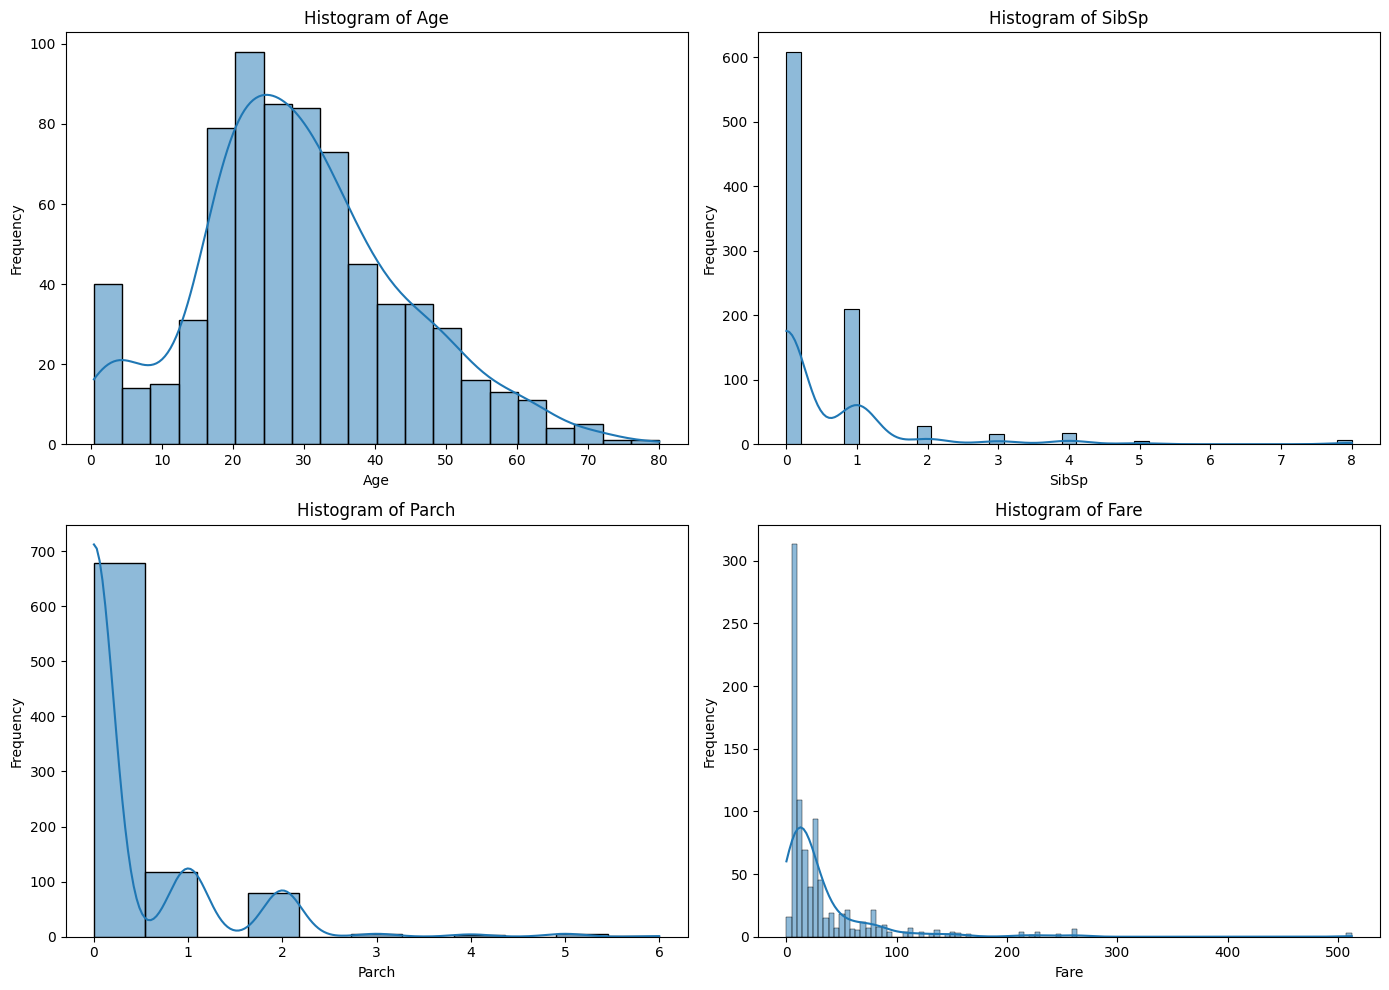

In [ ]:
# Plot histograms for numerical features
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, feature in enumerate(numerical_features):
    sns.histplot(train_data[feature].dropna(), ax=axes[i//2, i%2], kde=True)
    axes[i//2, i%2].set_title(f'Histogram of {feature}')
    axes[i//2, i%2].set_xlabel(feature)
    axes[i//2, i%2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
''' The age distribution is right skewed with maximum values between 20 - 30 years. Most passengers travelled alone.
fares are also rightly skewed indicating many passengers paied lower fares comparitively.
hence majority of passengers are in 3 class due to less fares.
males were higherin numbers.
The common embarked place was Southhampton.
Paggengers in 1 class have higher survival rate.
females have higher survival rate compared to men.
Higher paying passengers have higher survival rate as they belonged to 1 class.
cherbourg embarked passengers survived more comaparitively to other 2 locations.

SyntaxError: incomplete input (<ipython-input-4-1d29e883e544>, line 1)

In [ ]:
# Plot box plots for numerical features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, feature in enumerate(numerical_features):
    sns.boxplot(y=train_data[feature], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Box Plot of {feature}')
    axes[i//2, i%2].set_xlabel(feature)

plt.tight_layout()
plt.show()


In [ ]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:

# Feature Engineering from Cabin column since it has many null values.
train_data['CabinLetter'] = train_data['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'U')
test_data['CabinLetter'] = test_data['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'U')
train_data = train_data.drop(columns=['Cabin'])
test_data = test_data.drop(columns=['Cabin'])


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
# Handling  missing values
imputer = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), ['Age', 'Fare']),
        ('cat', SimpleImputer(strategy='most_frequent'), ['Embarked'])
    ],
    remainder='passthrough'  # Ensure other columns are passed through without change
)
train_data[['Age', 'Fare', 'Embarked']] = imputer.fit_transform(train_data[['Age', 'Fare', 'Embarked']])
test_data[['Age', 'Fare', 'Embarked']] = imputer.transform(test_data[['Age', 'Fare', 'Embarked']])


In [ ]:
# Encoding the  categorical variables
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'SibSp', 'Parch', 'Fare']),
        ('cat', OneHotEncoder(), ['Sex', 'Embarked', 'CabinLetter'])
    ]
)

In [ ]:
# Separate target variable and features
X = train_data.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
y = train_data['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)



In [ ]:
# Check for successful preprocessing
print(X_train.shape)
print(X_val.shape)

(712, 18)
(179, 18)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Build a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Predict on validation set
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]


In [ ]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

In [ ]:
print(f'Accuracy is : {accuracy:.4f}')
print(f'Precision is : {precision:.4f}')
print(f'Recall is : {recall:.4f}')
print(f'F1-score is : {f1:.4f}')
print(f'ROC AUC score is : {roc_auc:.4f}')

Accuracy is : 0.7933
Precision is : 0.7534
Recall is : 0.7432
F1-score is : 0.7483
ROC AUC score is : 0.8672


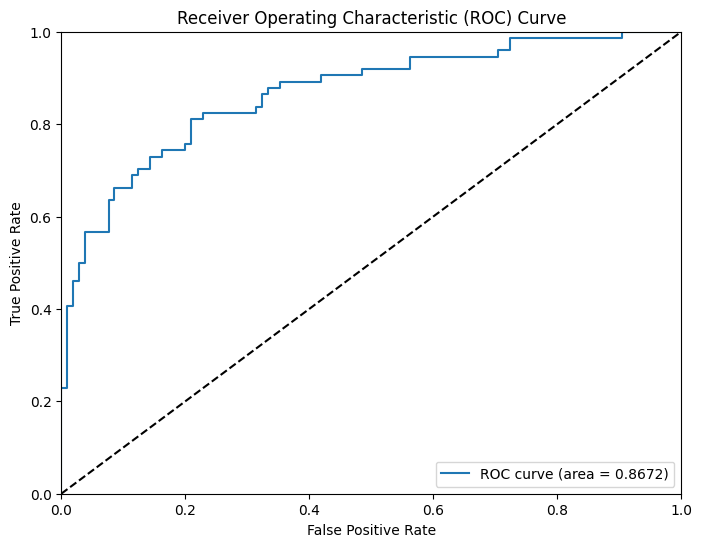

In [ ]:
# Visualize the ROC curve
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#  feature names after preprocessing
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(['Sex', 'Embarked', 'CabinLetter'])
feature_names = ['Age', 'SibSp', 'Parch', 'Fare'] + list(feature_names)

coefficients = model.coef_[0]

#displaying feature names and their corresponding coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the DataFrame by the absolute value of the coefficients
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False).drop(columns=['Abs_Coefficient'])

print(coef_df)
#Positive coeff means an increase in values increases the survuval chance whereas the opposite for negative.


          Feature  Coefficient
5        Sex_male    -1.335890
4      Sex_female     1.335751
13  CabinLetter_E     1.112358
17  CabinLetter_U    -1.038886
15  CabinLetter_G    -1.033555
12  CabinLetter_D     0.681807
1           SibSp    -0.378488
3            Fare     0.347685
10  CabinLetter_B     0.335629
6      Embarked_C     0.329110
14  CabinLetter_F     0.312996
0             Age    -0.307764
16  CabinLetter_T    -0.226725
7      Embarked_Q    -0.170641
11  CabinLetter_C    -0.166458
8      Embarked_S    -0.158608
2           Parch    -0.138222
9   CabinLetter_A     0.022695


In [ ]:

# Sex female is the most significant feature having higher survivability
# higher fares correlates with survivability.
# Specific cabins like B and D have higher survivability.
# Having parents/children increases surviving chances whereas having spouse/siblings decreases the survivability
# Embarkation of port Cherbourg has higher chances of surviving.



In [ ]:
1. What is the difference between precision and recall?


Precision measures the accuracy of positive predictions, while recall measures the completeness of positive predictions.
Precision is the ratio of correctly predicted positive observations to the total predicted positives. In other words, it measures the accuracy of the positive predictions. It is calculated as:

Precision=True Positives/True Positives+False Positives

In [ ]:
Recall: Recall, also known as sensitivity or true positive rate, is the ratio of correctly predicted positive observations to all actual positives. It measures the model's ability to find all the relevant cases within the data. It is calculated as:

Recall=True Positives/True Positives+False Negatives

Recall is important in cases where the cost of false negatives is high, and you want to minimize false negatives.

In [ ]:
2. What is cross-validation, and why is it important in binary classification?


Cross-validation is a technique used to assess the performance of machine learning models by splitting the dataset into
multiple subsets (folds) and training the model on different combinations of these subsets.
It helps to evaluate the model's performance in a more robust way compared to a single train-test split.

cross-validation is an essential technique in binary classification for obtaining reliable performance estimates,
reducing overfitting, and optimizing model hyperparameters.


In [ ]:
import joblib
from sklearn.linear_model import LogisticRegression

# Assuming 'model' is your trained logistic regression model
joblib.dump(model, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']

In [ ]:
!pip install streamlit
!pip install py-localtunnel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
# Write the Streamlit app script
%%writefile app.py

import streamlit as st
import joblib
import pandas as pd

# Load the trained model
model = joblib.load('logistic_regression_model.pkl')

# Function to preprocess user inputs
def preprocess_input(age, sibsp, parch, fare, sex, embarked, cabin_letter):
    data = {
        'Age': [age],
        'SibSp': [sibsp],
        'Parch': [parch],
        'Fare': [fare],
        'Sex_female': [1 if sex == 'female' else 0],
        'Sex_male': [1 if sex == 'male' else 0],
        'Embarked_C': [1 if embarked == 'C' else 0],
        'Embarked_Q': [1 if embarked == 'Q' else 0],
        'Embarked_S': [1 if embarked == 'S' else 0],
        'CabinLetter_A': [1 if cabin_letter == 'A' else 0],
        'CabinLetter_B': [1 if cabin_letter == 'B' else 0],
        'CabinLetter_C': [1 if cabin_letter == 'C' else 0],
        'CabinLetter_D': [1 if cabin_letter == 'D' else 0],
        'CabinLetter_E': [1 if cabin_letter == 'E' else 0],
        'CabinLetter_F': [1 if cabin_letter == 'F' else 0],
        'CabinLetter_G': [1 if cabin_letter == 'G' else 0],
        'CabinLetter_T': [1 if cabin_letter == 'T' else 0],
        'CabinLetter_U': [1 if cabin_letter == 'U' else 0]
    }
    return pd.DataFrame(data)

# Streamlit app
st.title('Titanic Survival Prediction')

# User inputs
age = st.number_input('Age', min_value=0, max_value=100, value=30)
sibsp = st.number_input('Number of Siblings/Spouses Aboard', min_value=0, max_value=8, value=0)
parch = st.number_input('Number of Parents/Children Aboard', min_value=0, max_value=6, value=0)
fare = st.number_input('Fare', min_value=0.0, value=30.0)
sex = st.selectbox('Sex', options=['male', 'female'])
embarked = st.selectbox('Port of Embarkation', options=['C', 'Q', 'S'])
cabin_letter = st.selectbox('Cabin Letter', options=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'U'])

# Predict button
if st.button('Predict Survival'):
    # Preprocess inputs
    input_data = preprocess_input(age, sibsp, parch, fare, sex, embarked, cabin_letter)

    # Make prediction
    prediction = model.predict(input_data)
    prediction_proba = model.predict_proba(input_data)[0][1]

    # Display result
    if prediction[0] == 1:
        st.success(f'The model predicts you would have survived with a probability of {prediction_proba:.2f}.')
    else:
        st.error(f'The model predicts you would not have survived with a probability of {prediction_proba:.2f}.')



Writing app.py


In [ ]:
## Run the Streamlit app
!streamlit run app.py &

# Expose the Streamlit app using localtunnel
!npx localtunnel --port 8501





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8506
  Network URL: http://172.28.0.12:8506
  External URL: http://34.66.155.92:8506

  Stopping...
your url is: https://sweet-llamas-boil.loca.lt
/tools/node/lib/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:24285 (check your firewall settings)
    at Socket.<anonymous> (/tools/node/lib/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (node:events:513:28)
    at emitErrorNT (node:internal/streams/destroy:157:8)
    at emitErrorCloseNT (node:internal/streams/destroy:122:3)
    at processTicksAndRejections (node:internal/process/task_queues:83:21)
